##Assignment-5: Practice ML Workflow that involves the following steps: data pre-processing, model training using gradient descent/ascent, addressing an ML challenge of optimization/ selecting the threshold for classification, performance evaluation and re-training using the optimal threshold. You can either use your own Logistic Regression implementation or the one that is provided by Python's library.

**Learning Outcome**: Students will learn the challenge of training, model selection and tuning of hyper-parameter (threshold) using Cross-Validation and Reciever Operating Curve (ROC) techniques. 

P.S: ROC and Cross-Validation topics will be covered in the subsequent lectures, so don't worry if you are unable to complete that part now.



# Implementing Logistics Regression in Python

In logistic regression we perform binary classification of by learnig a function of the form $f_w(x) = \sigma(x^\top w)$. Here $x,w \in \mathbb{R}^D$, where $D$ is the number of features as before. $\sigma(z) = \frac{1}{1+e^{-z}}$ is the logistic function.  Let's plot this function below

Text(0.5, 1.0, 'logistic function')

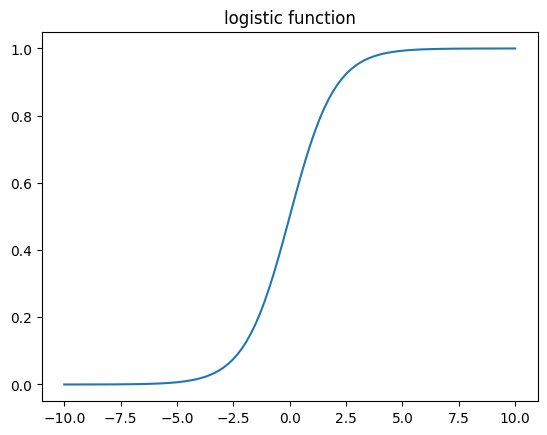

In [3]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-10,10,100)
plt.plot(z, logistic(z))
plt.title('logistic function')

## Cost function
To fit our model $f_w$ to the data $\mathcal{D} = \{x^{(1)}, \ldots, x^{(N)}\}$, we maximize the **logarithm of the conditional likelihood**:

$$
\ell(w; \mathcal{D}) = \sum_n \log \mathrm{Bernoulli}(y^{(n)} | \sigma({x^{(n)}}^\top w)) = \sum_n y^{(n)} \log \sigma({x^{(n)}}^\top w)) + (1-y^{(n)}) \log (1-\sigma({x^{(n)}}^\top w)))
$$

by substituting the definition of logistic function in the equation above, and minimizing the **negative** of the log-likelihood, which is called the **cost function**,
we get

$$
J(w) = \sum_n y^{(n)} \log(1+e^{-x w^\top}) + (1-y^{(n)}) \log(1+e^{x w^\top})
$$

In practice we use mean rather than sum over data points.

In [4]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

## Minimizing the cost using gradient descent
To minimize the cost we use gradient descent: start from some initial assignment to the parameters $w$, and at each iteration take a small step in the opposite direction of the *gradient*. The gradient of the cost function above is given by:

$$
\frac{\partial}{\partial w_d} J(w) =\sum_n - y^{(n)} x^{(n)}_d \frac{e^{-w^\top x^{(n)}}}{1 + e^{-w^\top x^{(n)}}} +x^{(n)}_d (1- y^{(n)}) \frac{e^{w^\top x^{(n)}}}{1 + e^{w^\top x^{(n)}}} = \sum_n - x^{(n)}_d y^{(n)} (1-\hat{y}^{(n)})+ x^{(n)}_d (1- y^{(n)}) \hat{y}^{(n)} = x^{(n)}_d (\hat{y}^{(n)} - y^{(n)}) 
$$
Since in practice we divide the cost by $N$, we have to the same for the gradient; see the implementation below.

fit this linear model to toy data with $x \in \Re^1$ + a bias parameter. Display the data

## Weight vs Cost 
**TASK: Similar to what we did for linear regression, we plot *Cost* as a function of model parameters (weights), and show the correspondence between the different weights having different costs and their fit. Visualize the cost and the fit.**

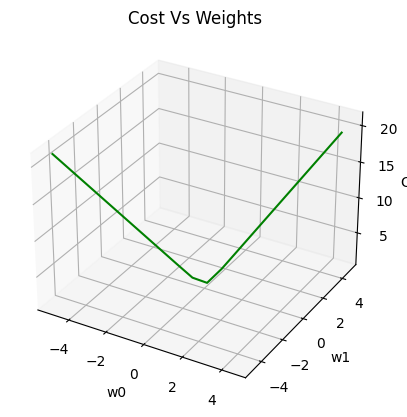

In [25]:
#Initially loading few Libraries 

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
dataset = datasets.load_iris()

X, y = dataset['data'][:,:2], dataset['target']
X, y = X[y < 2], y[y< 2]
weight_list = [[x,x+0.25] for x in np.arange(-5,5,0.5)]
cost = []
for weight in weight_list:
    cost.append(cost_fn(X,y,weight))

ax = plt.axes(projection ='3d')
w0 = list(zip(*weight_list))[0]
w1 = list(zip(*weight_list))[1]

ax.plot3D(w0, w1, cost, 'green')
ax.set_title('Cost Vs Weights')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')



plt.show()

In [26]:
#Reading 
from sklearn import datasets
LoanPrep = pd.read_csv("https://raw.githubusercontent.com/sumonacalpoly/Datasets/main/LoanApproval.csv", index_col=False)

In [27]:
LoanPrep



,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


# Data Cleaning and outlier treatment code goes here...........

# Data preparation steps

In [28]:
#Loading machine learning library from sklearn
from sklearn.model_selection import train_test_split

In [29]:
# Find out columns with missing values
LoanPrep.isnull().sum(axis=0)
# Replace Missing Values. Drop the rows.
LoanPrep = LoanPrep.dropna()

# Drop irrelevant columns based on business sense
LoanPrep = LoanPrep.drop(['gender'], axis=1)

# Create Dummy variables
LoanPrep.dtypes
LoanPrep = pd.get_dummies(LoanPrep, drop_first=True)


# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['income']])

# Do the same as above for 'loanamt'  



In [30]:
#Separating train and test data
Y = LoanPrep['status_Y']
X = LoanPrep.drop(['status_Y'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=123, stratify=Y)



# Split the X and Y dataset into training 80% and testing set 20%
 




# Training the classification model
**Use LogisticRegression class to do the training. Display the confusion matrix for the test set and report the accuracy score on the test set**

Accuracy for the default 0.5 threshold is: 0.8113207547169812


<AxesSubplot: >

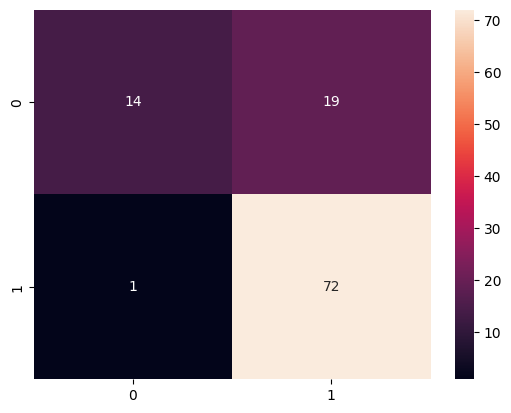

In [33]:
# instantiate a logistic regression model, and fit with X and y
# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
import seaborn as sns
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


# Predict the outcome using Test data
 
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print("Accuracy for the default 0.5 threshold is: " + str(score))

# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)


##ML Challenges: Model Selection and Hyper-Parameter Tuning##

**TASK: Use the ROC (Reciever Operating Curve) for finding the optimal threshold value for classification. To do so, use Cross-Validation technqiue on the training subset (80% of the entire dataset) for selecting this threshold.**

-- Then, apply the optimal threshold on a separate dataset known as the test set (the remaining 20%) for reporting the generalization performance. Report the accuracy, and confusion matrix on this generalization set.

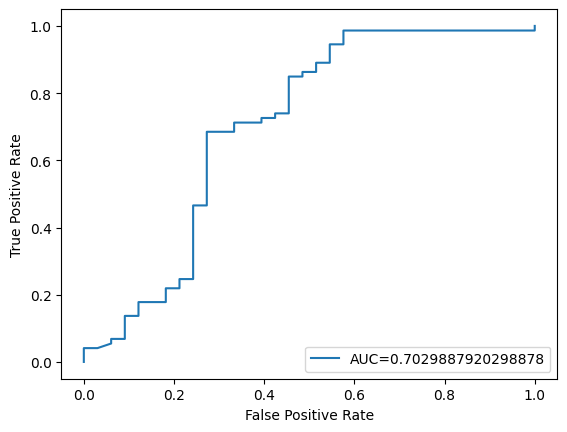

In [34]:
#define metrics
from sklearn import metrics

y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [38]:
import operator 
from sklearn.model_selection import KFold


A_train, A_test, A_y_train, A_y_test = train_test_split(X, Y, test_size= 0.2, random_state=1, stratify=Y)

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
inner_results = list()
#kf = KFold(n_splits = 5)
#X_train = X.loc[train_ix]

def y_class(y_hat, threshold):
    return [1 if i > threshold else 0 for i in y_hat]

def accuracy(true_values, predictions):
    return np.mean(true_values == predictions)
 
import warnings
warnings.filterwarnings("ignore")

li = [i for i in np.arange(0,1,0.1)]

best_accuracy = 0.0
threshold_for_best_accuracy = -1

for train_ix, val_ix in cv_outer.split(A_train):
	# split data
	X_train_outer = A_train.iloc[train_ix]   
	X_val_outer = A_train.iloc[val_ix]
	y_train_outer = A_y_train.iloc[train_ix]
	y_val_outer = A_y_train.iloc[val_ix]
	cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
	# define the model
	model = LogisticRegression()

	for thre in li:
		for inner_train_ix, inner_val_ix in cv_inner.split(X_train_outer):
	
			model = LogisticRegression()
			h_X_train_outer = A_train.iloc[inner_train_ix]
			h_X_val_outer = A_train.iloc[inner_val_ix]

			h_y_train_outer = A_y_train.iloc[inner_train_ix]
			h_y_val_outer = A_y_train.iloc[inner_val_ix]


			model.fit(h_X_train_outer, h_y_train_outer)
			y_pred_proba = model.predict_proba(h_X_val_outer)[::,1]

			predictions = y_class(y_pred_proba, thre)
			new_accuracy = (accuracy(predictions, h_y_val_outer))
			if new_accuracy > best_accuracy:
				best_accuracy = new_accuracy
				threshold_for_best_accuracy = thre
				print("New Best Accu found in Nested-CV for Threshold :{t}, and is is {A}".format(t=thre, A=new_accuracy))



 

New Best Accu found in Nested-CV for Threshold :0.0, and is is 0.7105263157894737
New Best Accu found in Nested-CV for Threshold :0.0, and is is 0.7368421052631579
New Best Accu found in Nested-CV for Threshold :0.0, and is is 0.7894736842105263
New Best Accu found in Nested-CV for Threshold :0.30000000000000004, and is is 0.868421052631579
New Best Accu found in Nested-CV for Threshold :0.30000000000000004, and is is 0.8947368421052632


Best threshold from Nested-CV is: 0.30000000000000004
Accuracy for the new threshold (0.30000000000000004) identified in nested-cv is: 0.8490566037735849


<AxesSubplot: >

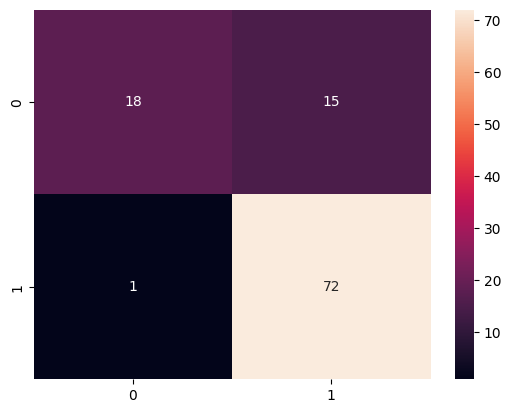

In [39]:

print("Best threshold from Nested-CV is: " + str(threshold_for_best_accuracy))

# Running logistic regresion on the new threshold
logisticRegr = LogisticRegression()
logisticRegr.fit(A_train, A_y_train)

y_pred_proba = logisticRegr.predict_proba(A_test)
y_pred_proba = y_pred_proba[::,1]

predictions = y_class(y_pred_proba, threshold_for_best_accuracy)
new_accuracy = accuracy(predictions, A_y_test)

print("Accuracy for the new threshold ({th}) identified in nested-cv is: {a}".format(th=threshold_for_best_accuracy, a = new_accuracy))


# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
new_cm = confusion_matrix(A_y_test, predictions)
sns.heatmap(new_cm, annot=True)



As we can see the accuracy has increased from 0.8113207547169812 to 0.8490566037735849 after we changed the threshold from 0.5 to 0.3. This new threshold is identified by the Nested-CV, and our optimisation is hence successful.
